# Auto-graded part

The block below imports the necessary packages and sets up the "blob" dataset you will use in this example and sets the random seed to ensure reproducible results.

In [1]:
import numpy as np
import pylab as plt

from sklearn.datasets import make_blobs

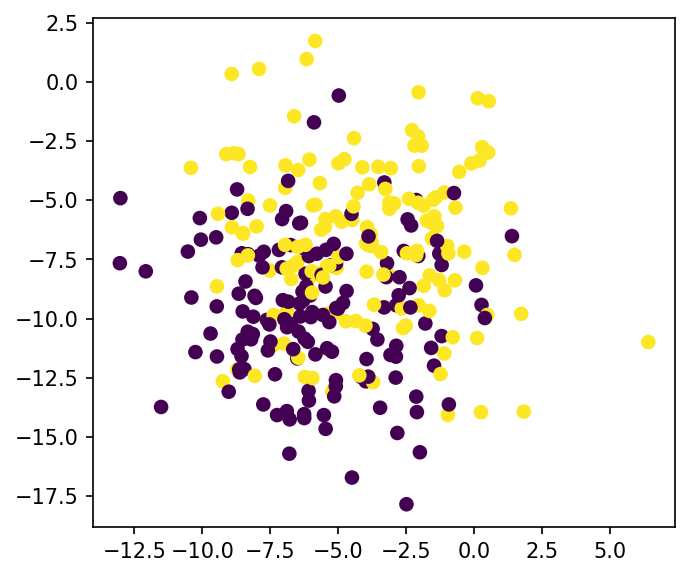

In [2]:
np.random.seed(65)

X_blob, y_blob = make_blobs(n_samples = 300, centers = 2, cluster_std = 3, n_features = 2)

fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)
ax.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob);

## 1. Perceptron Loss Function (22.5 pts)

Let's create a perceptron loss function by hand. The perceptron loss function discriminates between two different classes as follows:

$\bar{\bar{X}}\vec{w} > 0$ if $y_i = 1$ (class 1)

$\bar{\bar{X}}\vec{w} < 0$ if $y_i = -1$ (class 0)

Then, the perceptron loss function calculates $\sum_{i} max(0, -y_i\bar{\bar{X}}\vec{w})$. In this problem, you will play with `X_blob` and `y_blob`.

You may want to use `add_intercept` and `linear_classifier` functions through this problem.

In [3]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    X_intercept = np.append(intercept, X, 1)
    return X_intercept

def linear_classifier(X, w):
    X_intercept = add_intercept(X)
    p = np.dot(X_intercept, w)
    return [1 if pi > 0 else -1 for pi in p]

### 1a: Rescaling the target vector for the perceptron loss function

First, we need to rescale the `y_blob` to fit the definition we made. By default, `y_blob` consists of classes of `0` and `1`, but for the loss function we need classes to be labeled by `-1` and `1`. Name the rescaled `y_blob` as `y_blob_rescaled`. (7.5 pts)

In [4]:
########################################
y_blob_rescaled = y_blob *2 - 1
########################################

In [5]:
assert y_blob_rescaled.shape == (300,), "y_blob_rescaled not in a correct shape"
assert np.isclose(np.linalg.norm(y_blob_rescaled), 17.32050, atol=1e-4, rtol=0), "y_blob_rescaled not correct"

### 1b: Perceptron loss function

Create a function `perceptron` that calculates the $\sum_{i} max(0, -y_i\bar{\bar{X}}\vec{w})$. It should take the parameters as follows: (7.5 pts)

- w: parameter vector $\vec{w}$ (numpy.ndarray)
- X: feature matrix $\bar{\bar{X}}$ (numpy.ndarray, default value = `X_blob`)
- y: target classes $y_i$ (numpy.ndarray, default value = `y_blob_rescaled`)

In [6]:
####################################################
def perceptron(w, X = X_blob, y = y_blob_rescaled):
    Xi = add_intercept(X)
    dp = Xi @ w
    return sum(np.maximum(0, -y*dp))
####################################################

In [7]:
w1 = [10, 4, -10]
assert np.isclose(perceptron(w1), 12661.2141, atol=1e-4, rtol=0), "test run 1 failed"

w2 = [12, 4, -5]
assert np.isclose(perceptron(w2, X_blob, y_blob), 132.2978, atol=1e-4, rtol=0), "test run 2 failed" 

### 1c: Training a perceptron model

Find the optimal weight vector by using `scipy.optimize.minimize` function. You should use the `L-BFGS-B` algorithm for minimizing the perceptron loss function, and all other settings of `minimize` should be the default except `tol` which should be set to `1e-8`. The resulting optimized weight vector should be named as `w_opt`. The initial weight vector `w_init` is given for you. (2.5 pts)

In [8]:
from scipy.optimize import minimize

w_init = [30, 20, -50]

In [9]:
################################################################################
w_opt = minimize(perceptron, w_init, method = 'L-BFGS-B', tol = 1e-8).x
### note that just the name of the function is enough
#### the .x at the end is used to print the solution array for the minimization 
################################################################################

In [10]:
assert np.isclose(np.linalg.norm(w_opt), 1.2386e-06, atol=1e-4, rtol=0), "w_opt not correct"
assert np.isclose(w_opt[0], 1.2346e-06, atol=1e-4, rtol=0), "w_opt not correct"

### 1d: Metrics for assessing classification models

Report the accuracy, precision, and recall of your trained model as `accuracy`, `precision`, and `recall`, respectively. Positive refers to class 1 and negative refers to class -1. (5 pts)

In [11]:
#############################################################
def linear_classifier(X, w):
    X_intercept = add_intercept(X)
    p = np.dot(X_intercept, w)
    return p > 0  ### this statement checks if p>0 and returns T or F instead of the values

y_model = linear_classifier(X_blob, w_opt)

def acc_prec_recall(y_model, y_blob):
    TP = np.sum(np.logical_and(y_model == y_blob, y_model == 1))
    TN = np.sum(np.logical_and(y_model == y_blob, y_model == 0))
    FP = np.sum(np.logical_and(y_model != y_blob, y_model == 1))
    FN = np.sum(np.logical_and(y_model != y_blob, y_model == 0))
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    if TP == 0:
        precision = 0
        recall = 0
    else:
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
    return accuracy, precision, recall
[accuracy, precision, recall] = acc_prec_recall(y_model, y_blob)
#############################################################

In [12]:
assert np.isclose(accuracy*precision*recall, 0.2876, atol=1e-4, rtol=0), "classficiation metrics not correct"

AssertionError: classficiation metrics not correct

## 2. Support Vector Machine (27.5 pts)

In this problem, you will make use of the built-in support vector machine classifier (SVC) from the `scikit-learn` package.

### 2a: Importing the SVC object
 First, import a `SVC` object from `sklearn.svm`. (5 pts)

In [ ]:
########################################
from sklearn.svm import SVC
########################################

In [ ]:
assert SVC.__init__, "SVC not imported"

### 2b: Setting up a kernel support vector classifier

Declare a `SVC` object `svc` with `kernel='rbf'`. (7.5 pts)

In [ ]:
########################################
svc = SVC(kernel = 'rbf')
########################################

In [ ]:
assert svc.kernel == 'rbf', "SVC kernel not correct"

### 2c: Optimizing SVC hyperparameters with GridSearchCV

Given the list of $\alpha$ below, find the optimum $\alpha$ that returns the highest accuracy score using `GridSearchCV` for `X_blob` and `y_blob_rescaled`. You need to use 5-fold cross validation during hyperparameter tuning. Report the optimum $\alpha$ as `opt_alpha` and corresponding mean cross-validated accuracy score `opt_cv_acc`. (7.5 pts)

Hint: Remember that $\alpha$ is inversely proportional to the $C$ value used in the SVC loss function.

In [ ]:
from sklearn.model_selection import GridSearchCV

alphas = np.array([1e-6, 1e-5, 1e-4, 1e-3])

In [ ]:
######################################################################################
param_grid = {'C' : 1/alphas}  ### no gammas here

SVC_search = GridSearchCV(svc, param_grid, cv =5, scoring = 'accuracy') 
### 5-fold cross-validation, scoring method corresponding to what was asked
SVC_search.fit(X_blob, y_blob_rescaled) 

opt_alpha = 1/SVC_search.best_estimator_.C   ### name of the parameter in dictionary
opt_cv_acc = SVC_search.best_score_
#####################################################################################

In [ ]:
clrs = np.array(['#003057', '#EAAA00', '#4B8B9B', '#B3A369', '#377117', '#1879DB', '#8E8B76', '#F5D580', '#002233'])
y_predict = SVC_search.best_estimator_.predict(X_blob)
X = X_blob
fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].scatter(X[:, 0], X[:, 1], c = clrs[y_blob])
axes[1].scatter(X[:, 0], X[:, 1], c = clrs[y_predict]);

In [ ]:
assert np.isclose(opt_alpha * opt_cv_acc, 0.00067, atol=1e-4, rtol=0)

### 2d: Optimizing precision instead of accuracy

One nice feature of `GridSearchCV` is that you can optimize the performance with different scoring metrics. This may result in the different set of optimized hyperparameters. For classification, `GridSearchCV` computes the accuracy score by default. Let's see how `opt_alpha` will change as you compare the precision score during cross-validation. Repeat the same process above, but set `scoring = 'precision'` for `GridSearchCV`. Report the optimal `alpha` as `opt_alpha_prec` and corresponding mean cross-validated precision score `opt_cv_prec`. (7.5 pts)

In [ ]:
######################################################################################
param_grid = {'C' : 1/alphas}  ### no gammas here

SVC_search = GridSearchCV(svc, param_grid, cv =5, scoring = 'precision') 
### 5-fold cross-validation, scoring method corresponding to what was asked
SVC_search.fit(X_blob, y_blob_rescaled) 

opt_alpha_prec = 1/SVC_search.best_estimator_.C   ### name of the parameter in dictionary
opt_cv_prec = SVC_search.best_score_
#####################################################################################

In [ ]:
# opt_cv_prec =  np.max(SVC_search.cv_results_['mean_test_score'])
clrs = np.array(['#003057', '#EAAA00', '#377117', '#B3A369', '#377117', '#1879DB', '#8E8B76', '#F5D580', '#002233'])
y_predict = SVC_search.best_estimator_.predict(X_blob)
X = X_blob
fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].scatter(X[:, 0], X[:, 1], c = clrs[y_blob+1])
axes[1].scatter(X[:, 0], X[:, 1], c = clrs[y_predict+1]);

In [ ]:
assert np.isclose(opt_alpha_prec / opt_cv_prec, 0.0014821, atol=1e-4, rtol=0)

# Peer-graded section

The block below imports the necessary packages, sets up the "moons" dataset you will work with, and sets the random seed for repeatability.

In [ ]:
import numpy as np
import pylab as plt

from sklearn.datasets import make_moons

In [ ]:
np.random.seed(65)

X_blob, y_blob = make_moons(n_samples = 300, noise=0.3)

fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)
ax.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob);

## 1. Separability

You've worked on classifying the blob data in the previous section. In this section, we will work with the "moons" dataset and plot the result so that the classification performance can be assessed visually. Choose one loss function among perceptron, softmax, margin loss, counting loss, or suppor vector machine. Use the loss function to perform classification on the dataset above. Create a plot on which the data points are **color-coded by predicted classes** and the resulting **discrimination line is depicted as a black solid line**.

In [ ]:
y = y_blob *2 -1
X= X_blob

########################################################################## using the perceptron model
def perceptron_PG(w, X = X, y = y):
    Xi = add_intercept(X)
    dp = Xi @ w
    return sum(np.maximum(0, -y*dp))

w = ([-10, 4, -10])
w_perceptron = minimize(perceptron_PG, w).x ### first minimize the loss function valuve

Pred_perceptron = linear_classifier(X_blob, w_perceptron) ### now predict, but wont work as data is non-linearly separable

#### plots
fig, axes = plt.subplots(1, 3, figsize = (18, 6))
axes[0].scatter(X_blob[:, 0], X_blob[:, 1], c = clrs[y_blob + 1])
axes[1].scatter(X_blob[:, 0], X_blob[:, 1], c = clrs[Pred_perceptron +1])

m = -w_perceptron[1] / w_perceptron[2]
b = -w_perceptron[0] / w_perceptron[2]
axes[1].plot(X[:, 0], m*X[:, 0] + b, ls = '--', c = 'k')

axes[0].set_title('Original Data')
axes[1].set_title('Prediction (Perceptron LF)')

#################################################################### using the Support Vector Machine
def regularized_cost(w, X = X, y = y, alpha = 1):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept, w)
    cost = sum(np.maximum(0, 1 - y*Xb))
    cost += alpha*np.linalg.norm(w[1:], 2)
    return cost

w_guess = np.array([-10, -4, -10])
result = minimize(regularized_cost, w_guess, args = (X, y, 1))
w_svm = result.x

prediction = linear_classifier(X, w_svm)

axes[2].scatter(X[:, 0], X[:, 1], c = clrs[prediction + 1])

#plot line
m = -w_svm[1] / w_svm[2]
b = -w_svm[0] / w_svm[2]
axes[2].plot(X[:, 0], m*X[:, 0] + b, ls ='--', color ='k')
axes[2].set_title('Prediction (SVM LF)');

The moons dataset is clearly linearly inseparable. Try using a non-linear transforms of the features to make the data more linearly separable. Plot the new feature vs. one of the original features to check to see how separable it is after the transform.

**You are not expected to be able to create a perfectly linearly separable dataset after the transformation. As long as the separability improves you can consider it successful.**

In [ ]:
########################################################################## using the perceptron model
##### modification to account for non-linearity
X_new = np.exp(-(X[:,0]**2 + X[:,1]**2))
X_new = X_new.reshape(-1, 1)
X_nonlinear = np.append(X, X_new, 1)

w1 = ([-10, -4, 0, -10]) 
"""note that we have an extra parameter now because X_new has both the initial and transformed space data, Also, the sign 
of the second variable has to be negative to get a negative slope in the prediction line, If its positive the line is stupid """

w_perceptron1 = minimize(perceptron_PG, w1, args =(X_nonlinear,y)).x ### first minimize the loss function valuve, but pass new X

Pred_perceptron1 = linear_classifier(X_nonlinear, w_perceptron1) ### now predict, but wont work as data is non-linearly separable

#### plots
fig, axes = plt.subplots(1, 3, figsize = (18, 6))
axes[0].scatter(X_blob[:, 0], X_blob[:, 1], c = clrs[y_blob + 1])

axes[1].scatter(X_blob[:, 0], X_blob[:, 1], c = clrs[Pred_perceptron +1])               #### non-tranformed space
m = -w_perceptron[1] / w_perceptron[2]
b = -w_perceptron[0] / w_perceptron[2]
axes[1].plot(X[:, 0], m*X[:, 0] + b, ls = '--', c = 'k')

axes[2].scatter(X_nonlinear[:, 0],X_nonlinear[:, 2],c = clrs[Pred_perceptron1 + 1])        #### transformed-space
m = -w_perceptron1[1] / w_perceptron1[3]
b = -w_perceptron1[0] / w_perceptron1[3]
axes[2].plot(X[:, 0], m*X[:, 0] + b, ls = '--', c = 'k')

axes[0].set_title('Original Data')
axes[1].set_title('Prediction (Perceptron LF)')
axes[2].set_title('Prediction (Perceptron transformed space)')

#################################################################### using the Support Vector Machine
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors = 'k',
               levels=[-1, 0, 1],
               linestyles=['--', '-', '--'])
    if plot_support:
        # plot support vectors
        ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s = 300, linewidth = 1, facecolors = 'none', edgecolors = 'k');
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
svc_PG = SVC(kernel = 'rbf', gamma=1, C=100)
svc_PG.fit(X,y)              ### first fit the data
Pred_SVM = svc_PG.predict(X) ### now predict

fig, axes = plt.subplots(1, 3, figsize = (18, 6))
axes[0].scatter(X_blob[:, 0], X_blob[:, 1], c = clrs[y_blob + 1])

axes[1].scatter(X[:, 0], X[:, 1], c = clrs[prediction + 1])          #### non-tranformed space
m = -w_svm[1] / w_svm[2]
b = -w_svm[0] / w_svm[2]
axes[1].plot(X[:, 0], m*X[:, 0] + b, ls ='--', color ='k')
axes[1].set_title('Prediction (SVM LF)');

axes[2].scatter(X_blob[:, 0], X_blob[:, 1], c = clrs[Pred_SVM +1])   #### transformed-space
plot_svc_decision_function(svc_PG, ax = axes[2])
axes[0].set_title('Original Data')
axes[1].set_title('Prediction (SVM LF)');
axes[2].set_title('Prediction (in-built SVC module)')
plt.show()

What was your strategy to transform the features? Briefly explain.

Similar to linear regression, a non-linear model was endowed to the data by transforming the features using a Gaussian transfrom for 2 variables as given below:

$x_{nonlinear} = exp(-(x_0^2 + x_1^2))$

This clearly helped in segregating the data into a higher dimnesional space, which inturn helped in getting a better classification. The inbuilt SVC model is also shown to get a comparison between transformed perceptron and linear SVM cases.

## 2. Discrimination Line

Derive the equation for the line that discriminates between the two classes. Consider a model of the form:

$\bar{\bar{X}}\vec{w} > 0$ if $y_i = 1$ (class 1)

$\bar{\bar{X}}\vec{w} \leq 0$ if $y_i = -1$ (class -1)

where $\bar{\bar{X}}=\left[\vec{x_0}, \vec{x_1}, \vec{1}\right]$ and $\vec{w} = \left[w_0, w_1, w_2\right]$.

The equation should be in the form of $x_1 = f\left(x_0\right)$. Show your work, and/or explain the process you used to arrive at the answer.

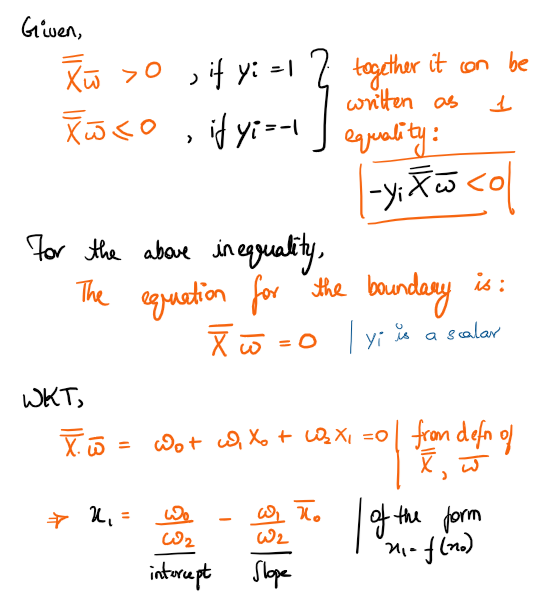

Next, we will consider a model with a non-linear transform defined by:

$y_i = w_0x_0 + w_1x_1 + w_2\left(x^2_0+x^2_1\right)$

where the model predicts class 1 if $y_i > 0$ and predicts class -1 if $y_i \leq 0$.

The equation should in the form of $x_1 = f\left(x_0\right)$. Show your work, and/or explain the process you used to arrive at the answer.

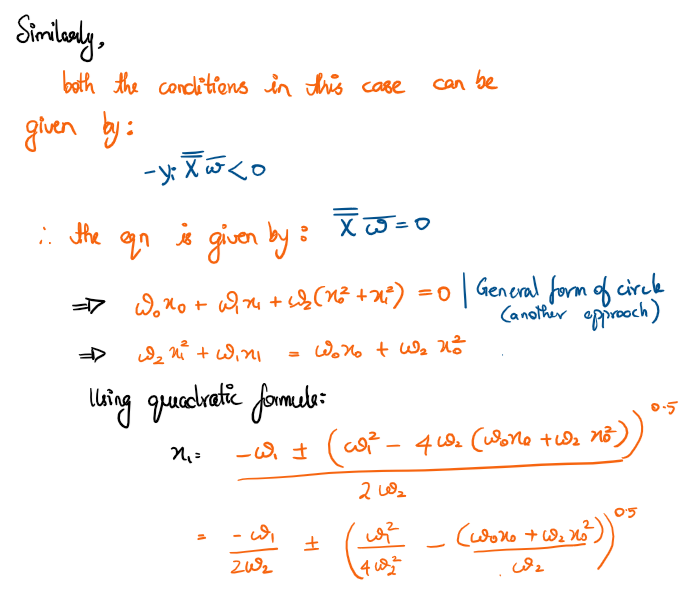

Briefly describe the nature of this boundary.

What is the shape of the bounday? Is is linear or non-linear? 

Hint: The form of the equation is a common one that you probably learned in highschool algebra.

**Answer:** The above equation is of the form:

$x^2 + y^2 + 2gx + 2fy + c = 0$

which represents a circle (non-linear boundary) with its centre at $${(\frac{-w_{0}}{2 w_{2}}, \frac{-w_{1}}{2 w_{2}})}$$ and a radius of $$ \frac{w_{0}^{2}+w_{1}^{2}}{4 w_{2}^{2}}$$

## 3. 6745 Only - Select one of the following two problems to solve

### 3a: Analytical gradient of the softmax function
The gradient of the softmax function is needed during optimization, and having an analytical form makes convergence faster and more numerically stable. 

Derive an analytical expression for the gradient of the softmax function with respect to $\vec{w}$.

The **softmax** loss function is defined as:

$g\left(\vec{w}\right)=\sum_i \mathrm{log}\left(1 + \mathrm{exp}\left(-y_i\vec{x}^T_i\vec{w}\right)\right)$

where $\vec{x}_i$ is the i-th row of the input matrix $\bar{\bar{X}}$.

***Hint***
- The function $g\left(\vec{w}\right)$ can be expressed as $f\left(r\left(s\left(\vec{w}\right)\right)\right)$ where $r$ and $s$ are arbitrary functions and the chain rule can be applied.
- You may want to review Ch.4 of "Machine Learning Refined, 1st Ed."

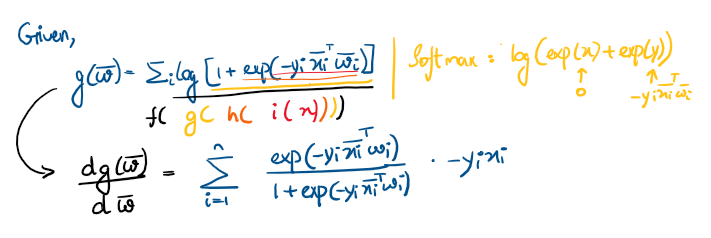

### 3b: Classification as non-linear regression

An alternative interpretation of classification is that we are performing non-linear regression to fit a **step function** to our data (because the output is either 0 or 1). Since step functions are not differentiable at the step, a smooth approximation with non-zero derivatives must be used. One such approximation is the ***tanh*** function:

$\mathrm{tanh\left(x\right)} = \frac{2}{1+e^{-x}} - 1$

This leads to a reformulation of the classification problem as:

$\vec{y} = \mathrm{tanh}\left(\bar{\bar{X}}\vec{w}\right)$

Show that this is mathematically equivalent to **logistic regression**, which is given by minimization of the **softmax** cost function.